# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.2, palette="Set2")
%matplotlib inline

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

$$
\begin{aligned}
&X \xrightarrow{\begin{bmatrix}W_{11}\\W_{12}\end{bmatrix}} \otimes \xrightarrow{\sigma(\cdot)} U_1(x) \cdot W_{21} \xrightarrow{} \otimes \xrightarrow{Id(\cdot)} y \\
&1 \xrightarrow{\begin{bmatrix}b_{11}\\b_{12}\end{bmatrix}} \otimes \xrightarrow{\sigma(\cdot)} U_2(x) \cdot W_{22} \xrightarrow{} \otimes \\
&1 \xrightarrow{b_3} \otimes
\end{aligned}
$$

Получилось 7 обучаемых параметров

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; \frac{2}{n}\sum_{i=1}^n \big(\widehat{y}(X_i) - Y_i\big)$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y_i}(x)} \frac{\partial \widehat{y_i}(x)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y_i}(x)} \frac{\partial \widehat{y_i}(x)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y_i}(x)} \frac{\partial \widehat{y_i}(x)}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; \sigma(x) \big(1 -\sigma(x)\big)$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; u_h(X_i) \big(1 -u_h(X_i)\big) \cdot X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; u_h(X_i) \big(1 -u_h(X_i)\big)$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

**Решение:** В таком случае можно, например, использовать стохастический градиентный спуск. А именно:
1. Разбиваем данные на блоки (батчи).
2. Для каждого блока считаем градиент и обновляем параметры.

**Вывод:**
Итак, мы рассмотрели простую двухслойную нейронную сеть и посчиатели произодные функции потерь методом обратного распространения ошибки (backpropagation). Это нужно для нахождения оптимальных параметров модели при минимизации функции потерь. Также мы показали, что делать, если обучающая выборка очень большая.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [2]:
import torch
from torch import nn

print(torch.__version__)

2.9.0


Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [3]:
sample_size = int(1e6)
x = sps.norm.rvs(size=(sample_size, 1))
train_x, test_x = train_test_split(x, train_size=0.7, shuffle=True)
y = train_x**2 + 2 * train_x

assert y.shape == train_x.shape

Обучите нейросеть на этих данных. Используйте код с занятия.

Зададим архитектуру нейросети, скорость обучения и функцию потерь:

In [4]:
def optim_func(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

Поменяем размерности для работы с молелью:

In [5]:
train_x = torch.FloatTensor(train_x)
test_x = torch.FloatTensor(test_x)
y = torch.FloatTensor(y)

Напишем функцию визуализации процесса обучения.

In [6]:
def show_progress(x, y, y_pred, loss):
    y_pred = y_pred.detach()
    loss = loss.item()
    clear_output(wait=True)

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75, label="Реальные значния")
    plt.scatter(x, y_pred, color="orange", linewidth=5, label="Предсказание")
    plt.legend(title="Функция").get_frame().set_facecolor("white")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Результат обучения модели\n")
    plt.show()

    print(f"MSE = {loss:.3f}")

Релизуем саму модель и одновременно визуализируем

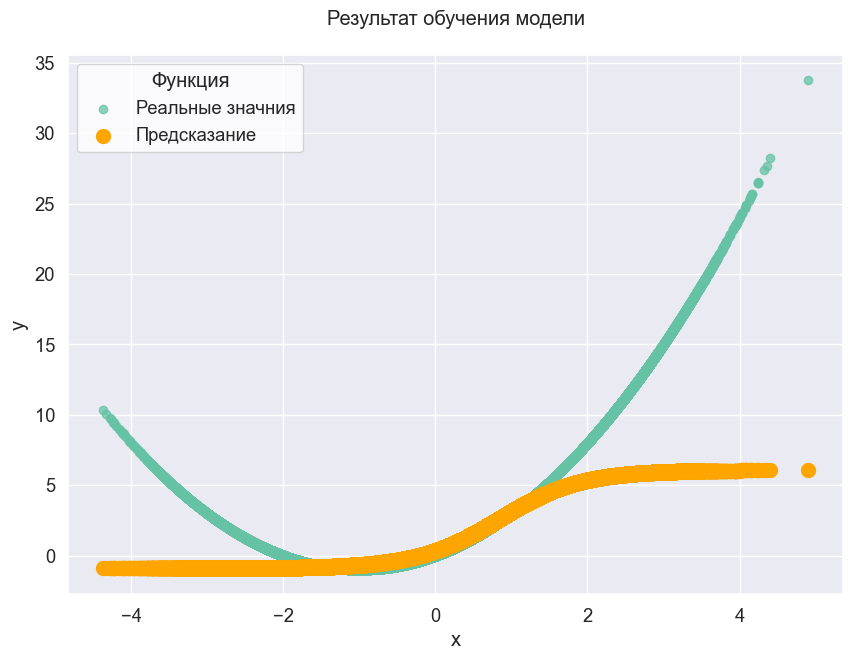

MSE = 0.981
Готово!


In [7]:
w11 = torch.ones(1, requires_grad=True)
b11 = torch.ones(1, requires_grad=True)
w12 = torch.ones(1, requires_grad=True)
b12 = torch.ones(1, requires_grad=True)
w21 = torch.ones(1, requires_grad=True)
w22 = torch.ones(1, requires_grad=True)
b2 = torch.ones(1, requires_grad=True)


def act_func(x):
    return (1 + torch.exp(-x)) ** (-1)


num_iter = 10000

lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):
    y_pred = (
        w21 * act_func(w11 * train_x + b11) + w22 * act_func(w12 * train_x + b12) + b2
    )
    
    loss = optim_func(y_pred, y)
    loss.backward()

    w11.data -= lr_w * w11.grad.data
    b11.data -= lr_b * b11.grad.data
    w12.data -= lr_w * w12.grad.data
    b12.data -= lr_b * b12.grad.data
    b2.data -= lr_b * b2.grad.data
    w21.data -= lr_w * w21.grad.data
    w22.data -= lr_b * w22.grad.data

    w11.grad.zero_()
    b11.grad.zero_()
    w12.grad.zero_()
    b12.grad.zero_()
    b2.grad.zero_()
    w21.grad.zero_()
    w22.grad.zero_()

    if (i + 1) % 5 == 0 and loss.item() < 1:
        show_progress(train_x, y, y_pred, loss)
        print("Готово!")
        break

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

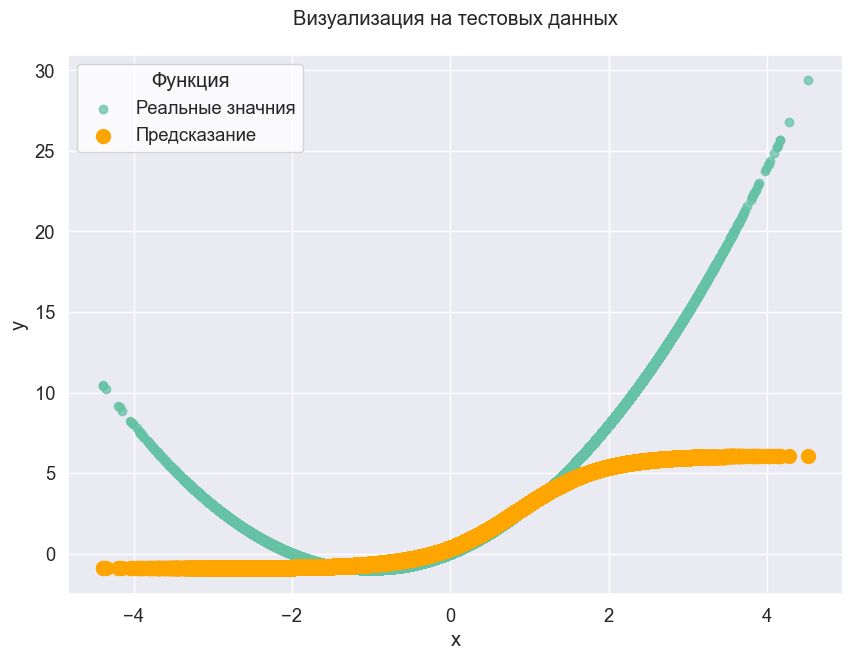

In [8]:
test_y_pred = (
    w21 * act_func(w11 * test_x + b11) + w22 * act_func(w12 * test_x + b12) + b2
)
test_y_true = test_x**2 + 2 * test_x

plt.figure(figsize=(10, 7))
plt.scatter(test_x, test_y_true.detach(), alpha=0.75, label="Реальные значния")
plt.scatter(
    test_x, test_y_pred.detach(), color="orange", linewidth=5, label="Предсказание"
)
plt.legend(title="Функция").get_frame().set_facecolor("white")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Визуализация на тестовых данных\n")
plt.show()

Посчитаем MSE на тестовых данных:

In [9]:
print("MSE:", round(optim_func(test_y_pred, test_y_true).item(), 3))

MSE: 0.972


**Вывод:**
Как видим, MSE на обучающих и тестовых данных совпадают, а значит, модель не переобучилась.